In [4]:
# import stuff we might need
# this notebook is for gathering other data for our analyses

import os
import sys
import csv
import math
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

In [5]:
# Make a pandas df for age groups and registered drivers
# ignore first path, not putting it in github because we don't need most of the data
# I will output a more useful csv after I format it a little
csvpth = os.path.join("..", "agereg.csv")
agedf = pd.read_csv(csvpth)

# making a note that this csv is incredibly awful to look at

# there are some specified age groups I can grab
# column index + 2 has the total for that age group
# year 2015 is in index 55

ageDict = {"15-19" : agedf["Unnamed: 18"].iloc[55], "20-24" : agedf["Unnamed: 36"].iloc[55], "30-34" : agedf["Unnamed: 42"].iloc[55], 
          "25-29" : agedf["Unnamed: 39"].iloc[55], "35-39" : agedf["Unnamed: 45"].iloc[55], "40-44" : agedf["Unnamed: 48"].iloc[55], 
          "45-49" : agedf["Unnamed: 51"].iloc[55], "50-54" : agedf["Unnamed: 54"].iloc[55], "55-59" : agedf["Unnamed: 57"].iloc[55], 
          "60-64" : agedf["Unnamed: 60"].iloc[55], "65-69" : agedf["Unnamed: 63"].iloc[55], "70-74" : agedf["Unnamed: 66"].iloc[55], 
          "75-79" : agedf["Unnamed: 69"].iloc[55], "80-84" : agedf["Unnamed: 72"].iloc[55], "85+" : agedf["Unnamed: 75"].iloc[55]}
# ageDict has number of licensed drivers in 2015 by age group

agedf = pd.DataFrame(ageDict, index = list(ageDict.keys()))



FileNotFoundError: File b'..\\agereg.csv' does not exist

In [2]:
# Modify drivers by age csv to include number of crashes by age group
# Note that original csv was meant to be in thousands
agedf = pd.read_csv("licensed_drivers_by_age.csv", header = None)
agedf[1] = agedf[1].str.strip() + ",000"
agedf.rename(columns = {0 : "Age Group", 1 : "Licensed Drivers"}, inplace =True)

In [3]:
# Get crashes list and get age column
pth = os.path.join("FARS2015NationalCSV", "person.csv")
ages = pd.read_csv(pth)
#ages.head()
# Only care about ages and crashes
ages = ages["AGE"]

In [5]:
# crash number dictionary to gather number of crashes per age range
# dictionary comprehension
crashDict = dict((k,0) for k in list(agedf["Age Group"]))
crashDict["Trash"] = 0
crashDict

{'15-19': 0,
 '20-24': 0,
 '30-34': 0,
 '25-29': 0,
 '35-39': 0,
 '40-44': 0,
 '45-49': 0,
 '50-54': 0,
 '55-59': 0,
 '60-64': 0,
 '65-69': 0,
 '70-74': 0,
 '75-79': 0,
 '80-84': 0,
 '85+': 0,
 'Trash': 0}

In [18]:
for age in ages:
    if age < 20:
        crashDict['15-19'] += 1
    elif age < 25:
        crashDict['20-24'] += 1
    elif age < 30:
        crashDict['25-29'] += 1
    elif age < 35:
        crashDict['30-34'] += 1
    elif age < 40:
        crashDict['35-39'] += 1
    elif age < 45:
        crashDict['40-44'] += 1
    elif age < 50:
        crashDict['45-49'] += 1
    elif age < 55:
        crashDict['50-54'] += 1
    elif age < 60:
        crashDict['55-59'] += 1
    elif age < 65:
        crashDict['60-64'] += 1
    elif age < 70:
        crashDict['65-69'] += 1
    elif age < 75:
        crashDict['70-74'] += 1
    elif age < 80:
        crashDict['75-79'] += 1
    elif age < 85:
        crashDict['80-84'] += 1
    elif age < 900:
        crashDict['85+'] += 1
    else:
        crashDict['Trash'] += 1
crashDict

In [46]:
#crashDict

#Make agedf index the age group
# FIRST REMOVE TRASH ENTRY FROM CRASHDICT

if "Trash" in crashDict.keys():
    del crashDict['Trash']
#agedf = agedf.set_index('Age Group')

#
#DELETE THE COMMENT ON agedf = ..... if running this for the first time
#

# turn crashDict into DataFrame
agecrash = pd.DataFrame.from_dict(crashDict, orient = 'index')
agecrash.rename(columns = {0 : 'Accidents'}, inplace = True)

#merge the two
mergedAges = agedf.merge(agecrash, left_index = True, right_index = True)
mergedAges

,Licensed Drivers,Accidents
Age Group,,
15-19,"8,591,000",13199
20-24,"17,630,000",9898
30-34,"19,120,000",6464
25-29,"19,266,000",7978
35-39,"18,088,000",5714
40-44,"18,107,000",5250
45-49,"18,988,000",5289
50-54,"20,488,000",5853
55-59,"20,068,000",5257


In [59]:
# fix up data types and do calculations
#for s in mergedAges['Licensed Drivers']:
#    tempL = s.split(',')
#    tempS = ''
#    for l in tempL:
#        tempS += l
#    tempS = float(tempS)
#    mergedAges['Licensed Drivers'].replace(to_replace = s, value = tempS, inplace = True)

#mergedAges['Accidents per Driver (10^-4)'] = mergedAges['Accidents'] / mergedAges['Licensed Drivers'] * 10000


# Don't run any of this unless it hasn't been run before on this kernel

In [64]:
mergedAges = mergedAges.reindex(["15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65-69", "70-74", "75-79", "80-84", "85+"])
mergedAges

,Licensed Drivers,Accidents,Accidents per Driver (10^-4)
Age Group,,,
15-19,8591000.0,13199,15.363753
20-24,17630000.0,9898,5.614294
25-29,19266000.0,7978,4.140974
30-34,19120000.0,6464,3.380753
35-39,18088000.0,5714,3.159000
40-44,18107000.0,5250,2.899431
45-49,18988000.0,5289,2.785443
50-54,20488000.0,5853,2.856794
55-59,20068000.0,5257,2.619593


In [65]:
mergedAges.to_csv("agesAccidents.csv")
# save to csv just in case

In [3]:
#list(mergedAges.index)
plt.bar(x = list(mergedAges.index), height = list(mergedAges['Accidents per Driver (10^-4)']), color = 'steelblue', alpha = 1)
plt.xlabel('Age Groups')
plt.xticks(rotation=90)
plt.ylabel('Fatal Accidents per 10,000 Drivers')
pltpth = os.path.join("Charts", "AgeGroup.png")
plt.savefig(pltpth)
#plt.show()

NameError: name 'mergedAges' is not defined

In [2]:
# read in accident.csv from FARS2015NationalCSV folder
# need HOUR, MINUTE columns for each unique ST_CASE
# turn HOUR into minutes, add to MINUTE, get new column TIME as minutes after midnight

# EDIT: Making bar chart based on hour, so only collecting HOUR and ST_CASE

csvpth = os.path.join("FARS2015NationalCSV", "accident.csv")
#csvpth = "FARS2015NationalCSV/accident.csv"
timeDF = pd.read_csv(csvpth)
#timeDF = timeDF[["ST_CASE", "HOUR", "MINUTE"]]
timeDF = timeDF[["ST_CASE", "HOUR"]]
timeDF = timeDF.drop_duplicates(subset = 'ST_CASE', keep = 'first', inplace = False)

In [4]:
#timeDF.head()
#timeDF["TIME"] = timeDF["HOUR"] * 60 + timeDF["MINUTE"]


,ST_CASE,HOUR
0,10001,2
1,10002,22
2,10003,1
3,10004,0
4,10005,7


In [3]:
#import timeDF to csv for safety and whatever
timepth = os.path.join("Cleaned Data", "crashtimebar.csv")
timeDF.to_csv(timepth)

In [5]:
# Get frequencies and times in a new Series
timeSR = timeDF["HOUR"].value_counts()
timeSR = timeSR.sort_values(ascending = True)

In [6]:
# 6039 for TIME, 99 for HOUR
timeSR = timeSR.drop(labels = 99, inplace = False)

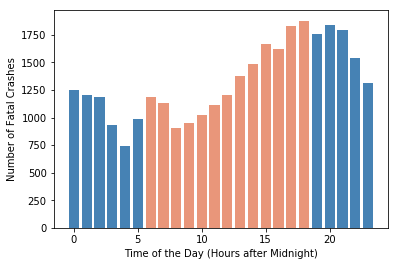

In [8]:
#plt.scatter(x = timeSR.index, y = timeSR.values, c = ['steelblue' if (t < 360 or t > 1080) else 'darksalmon' for t in list(timeSR.index)], alpha = 1)
plt.bar(x = timeSR.index, height = timeSR.values, color = ['steelblue' if (t < 6 or t > 18) else 'darksalmon' for t in list(timeSR.index)], alpha = 1)
plt.xlabel("Time of the Day (Hours after Midnight)")
plt.ylabel("Number of Fatal Crashes")
tcrashpth = os.path.join("Charts", "timecrashesbar.png")
plt.savefig(tcrashpth)
#plt.show()